In [1]:
import sklearn.datasets
import sklearn.metrics

import autosklearn.regression
import matplotlib.pyplot as plt
from autosklearn.metrics import mean_squared_error

import pandas as pd
pd.options.display.max_rows = 100

X, y = sklearn.datasets.load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=24
)

params = {
    'allow_string_features': False,
    'dask_client': None,
    'dataset_compression': False,
    'delete_tmp_folder_after_terminate': True,
    'disable_evaluator_output': False,
    'ensemble_class': autosklearn.ensembles.ensemble_selection.EnsembleSelection,
    'ensemble_kwargs': {'ensemble_size': 1},
    'ensemble_nbest': 50,
    'ensemble_size': None,
    'exclude': None,
    'get_smac_object_callback': None,
    'get_trials_callback': None,
    'include': {
        'regressor': [
            'adaboost',
            'ard_regression',
            'decision_tree',
            'extra_trees',
            'gaussian_process',
            'gradient_boosting',
            'k_nearest_neighbors',
            'liblinear_svr',
            'libsvm_svr',
            'mlp',
            'random_forest',
            'sgd'
        ],
        'feature_preprocessor': [
            'densifier',
            'extra_trees_preproc_for_regression',
            'fast_ica',
            'feature_agglomeration',
            'kernel_pca',
            'kitchen_sinks',
            'no_preprocessing',
            'nystroem_sampler',
            'pca',
            'polynomial',
            'random_trees_embedding',
            'select_percentile_regression',
            'select_rates_regression',
            'truncatedSVD'
        ]
    },
    'initial_configurations_via_metalearning': 25,
    'load_models': True,
    'logging_config': None,
    'max_models_on_disc': 50,
    'memory_limit': 3072,
    'metadata_directory': None,
    'metric': mean_squared_error,
    'n_jobs': -1,
    'per_run_time_limit': 20,
    'resampling_strategy': 'holdout',
    'resampling_strategy_arguments': {
        'train_size': 0.67,
        'shuffle': True,
        'folds': 5
    },
    'scoring_functions': None,
    'seed': 24,
    'smac_scenario_args': None,
    'time_left_for_this_task': 60,
    'tmp_folder': None
}

automl = autosklearn.regression.AutoSklearnRegressor(
    **params
)
automl.fit(X_train, y_train, X_test, y_test)

train_predictions = automl.predict(X_train)
print("Train MSE:", sklearn.metrics.mean_squared_error(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test MSE:", sklearn.metrics.mean_squared_error(y_test, test_predictions))

pot = automl.performance_over_time_

print(pot)

Train MSE: 2856.9978041757504
Test MSE: 2861.3524999950955
                    Timestamp  ensemble_optimization_score  \
16 2022-10-26 08:46:34.000000                          NaN   
18 2022-10-26 08:46:35.000000                          NaN   
0  2022-10-26 08:46:35.119099                  3249.377552   
31 2022-10-26 08:46:36.000000                  3249.377552   
3  2022-10-26 08:46:37.021616                  3114.696954   

    ensemble_test_score  single_best_optimization_score  \
16                  NaN                     3390.133471   
18                  NaN                     3249.377552   
0            3056.36484                     3249.377552   
31           3056.36484                     3114.696954   
3            2861.35250                     3114.696954   

    single_best_train_score  single_best_test_score  
16              2535.135513             2908.654161  
18              2795.935634             3056.364840  
0               2795.935634             3056.364840

In [2]:
pot

,Timestamp,ensemble_optimization_score,ensemble_test_score,single_best_optimization_score,single_best_train_score,single_best_test_score
16,2022-10-26 08:46:34.000000,NaN,NaN,3390.133471,2535.135513,2908.654161
18,2022-10-26 08:46:35.000000,NaN,NaN,3249.377552,2795.935634,3056.364840
0,2022-10-26 08:46:35.119099,3249.377552,3056.36484,3249.377552,2795.935634,3056.364840
31,2022-10-26 08:46:36.000000,3249.377552,3056.36484,3114.696954,2728.731259,2861.352500
3,2022-10-26 08:46:37.021616,3114.696954,2861.35250,3114.696954,2728.731259,2861.352500


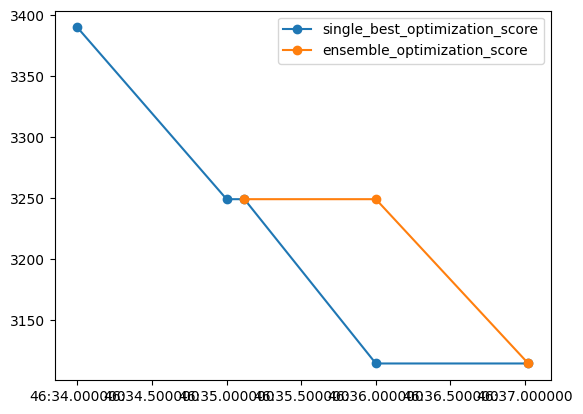

In [3]:
plt.plot(pot['Timestamp'], pot['single_best_optimization_score'], '-o', label = 'single_best_optimization_score')
plt.plot(pot['Timestamp'], pot['ensemble_optimization_score'], '-o', label = 'ensemble_optimization_score')
plt.legend()

In [4]:
automl.automl_._get_runhistory_models_performance()

,Timestamp,single_best_optimization_score,single_best_train_score,single_best_test_score
0,2022-10-26 08:46:36,3566.974222,4.588637e+02,3095.679501
1,2022-10-26 08:46:35,5547.237465,8.204380e+00,5956.516151
2,2022-10-26 08:46:34,3390.133471,2.535136e+03,2908.654161
3,2022-10-26 08:46:36,3724.428604,4.512352e+02,3630.227129
4,2022-10-26 08:46:36,3719.130921,3.662203e+02,3675.552091
5,2022-10-26 08:46:35,3249.377552,2.795936e+03,3056.364840
6,2022-10-26 08:46:36,3114.696954,2.728731e+03,2861.352500
7,2022-10-26 08:46:46,3630.416885,9.277512e+02,3809.271137
8,2022-10-26 08:46:40,3664.152871,0.000000e+00,3114.280041
9,2022-10-26 08:46:38,5547.237465,1.833271e+00,5956.516151
